## Імпорт бібліотек

import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import matplotlib.pyplot as plt

c:\Users\Стас\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


## Завантаження даних



In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=[0])
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


## Завдання
1. Створити модель `Prophet` визначивши правильну сезонність (`yearly_seasonality=True`)
2. Натренувати модель
3. Зробити кросс-валідацію
4. Порахувати середні метрики


In [4]:
train, test = df[:-12], df[-12:]
model = Prophet(daily_seasonality=False,
                weekly_seasonality=False,
                yearly_seasonality=True)
model.fit(train)

11:25:22 - cmdstanpy - INFO - Chain [1] start processing
11:25:23 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
pred_df = model.make_future_dataframe(periods=12, freq='m')

In [8]:
prediction = model.predict(pred_df)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,109.172912,59.285385,111.112984,109.172912,109.172912,-23.941969,-23.941969,-23.941969,-23.941969,-23.941969,-23.941969,0.0,0.0,0.0,85.230943
1,1949-02-01,111.325531,54.055305,102.979150,111.325531,111.325531,-32.466121,-32.466121,-32.466121,-32.466121,-32.466121,-32.466121,0.0,0.0,0.0,78.859410
2,1949-03-01,113.269831,90.850759,140.062604,113.269831,113.269831,3.286811,3.286811,3.286811,3.286811,3.286811,3.286811,0.0,0.0,0.0,116.556642
3,1949-04-01,115.422450,81.710905,134.401998,115.422450,115.422450,-6.123571,-6.123571,-6.123571,-6.123571,-6.123571,-6.123571,0.0,0.0,0.0,109.298878
4,1949-05-01,117.505629,87.188703,138.421996,117.505629,117.505629,-5.272941,-5.272941,-5.272941,-5.272941,-5.272941,-5.272941,0.0,0.0,0.0,112.232688


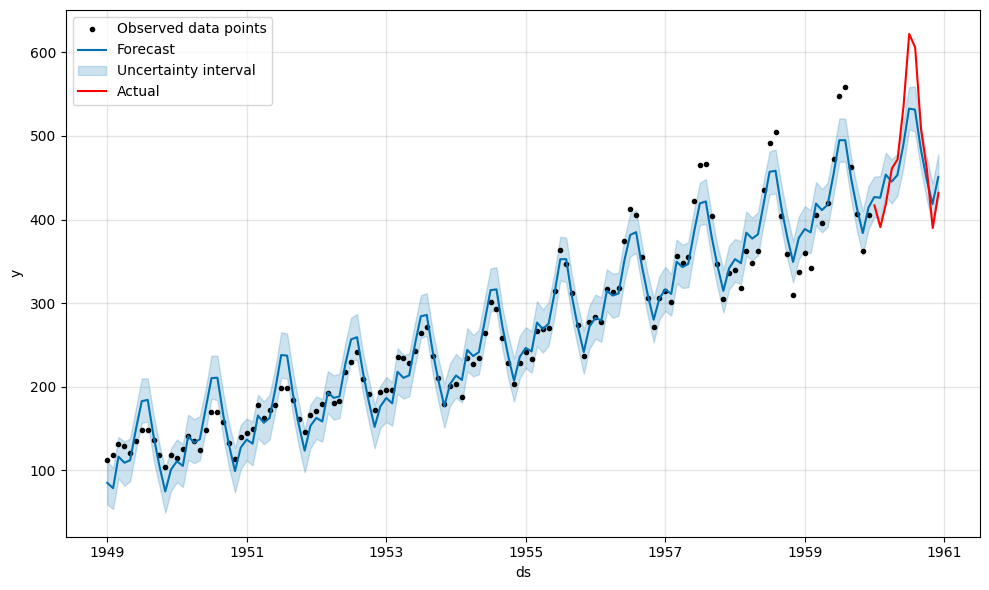

In [ ]:
model.plot(prediction)
plt.plot(test['ds'], test['y'], label='Actual', color='red')
plt.legend()
plt.show()

In [14]:
model = Prophet(daily_seasonality=False,
                weekly_seasonality=False,
                yearly_seasonality=True)
model.fit(df)

11:30:22 - cmdstanpy - INFO - Chain [1] start processing
11:30:22 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
cv = cross_validation(model=model,
                      initial='8 y',
                      period='1 y',
                      horizon='1 y')

c:\Users\Стас\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\diagnostics.py:124: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  horizon = pd.Timedelta(horizon)
c:\Users\Стас\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\diagnostics.py:143: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  period = 0.5 * horizon if period is None else pd.Timedelta(period)
c:\Users\Стас\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\diagnostics.py:148: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  else pd.Timedelta(initial)
  0%|          | 0/3 [00:00<?, ?it/s]11:32:06 - cmdstanpy - INFO - Chain [1] start processing
11:32:06 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 1/3 [00:00<00:00,  3.60it/

In [20]:
cv.head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1958-01-01,371.933833,353.036634,392.418771,340,1957-12-01 06:32:24
1,1958-02-01,370.709291,351.480346,389.718408,318,1957-12-01 06:32:24
2,1958-03-01,402.699788,383.299523,421.313828,362,1957-12-01 06:32:24
3,1958-04-01,398.246297,379.344115,417.670368,348,1957-12-01 06:32:24
4,1958-05-01,400.990900,381.699760,419.717940,363,1957-12-01 06:32:24
5,1958-06-01,431.844977,413.276806,450.916291,435,1957-12-01 06:32:24
6,1958-07-01,462.817519,441.553935,480.605117,491,1957-12-01 06:32:24
7,1958-08-01,460.019555,442.199774,478.331188,505,1957-12-01 06:32:24
8,1958-09-01,431.092690,412.034487,451.708922,404,1957-12-01 06:32:24
9,1958-10-01,400.698237,380.716257,419.455099,359,1957-12-01 06:32:24


In [26]:
avg_metrics = performance_metrics(cv)
print(avg_metrics[['mse', 'rmse', 'mae']].mean())

mse     1690.242673
rmse      38.344494
mae       34.134634
dtype: float64


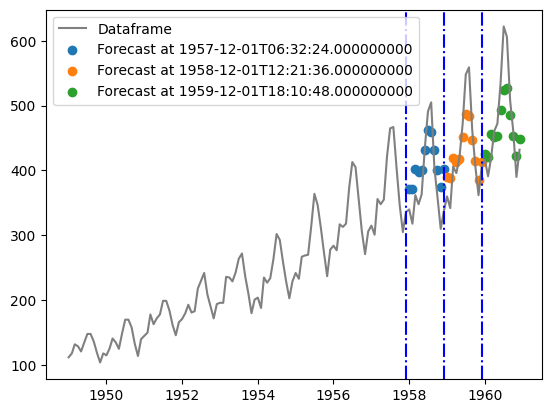

In [33]:
cuttofs = cv['cutoff'].unique()

plt.plot(df['ds'], df['y'], label='Dataframe', color = 'grey')

for cuttof in cuttofs:
    plt.axvline(cuttof, color='blue', linestyle='-.')
    df_tmp=cv[cv['cutoff']==cuttof]
    plt.scatter(df_tmp['ds'], df_tmp['yhat'], label=f'Forecast at {cuttof}')

plt.legend()
plt.show()